In [8]:
import matplotlib.pyplot as plt
import numpy as np
import webbpsf

import matplotlib as mpl
mpl.rcParams["image.cmap"] = "hot"
mpl.rcParams["image.origin"] = "lower"
mpl.rcParams["image.interpolation"] = "nearest"

In [9]:
wfi = webbpsf.roman.WFI()

Attempted to get aberrations at field point (0, 0) which is outside the range of the reference data; approximating to nearest interpolated point (0.0, 37.0)
Attempted to get aberrations at field point (2048, 0) which is outside the range of the reference data; approximating to nearest interpolated point (2048.0, 37.0)
Attempted to get aberrations at field point (4095, 0) which is outside the range of the reference data; approximating to nearest input grid point
Attempted to get aberrations at field point (4095, 2048) which is outside the range of the reference data; approximating to nearest interpolated point (4084.50759122653, 2047.9974308499575)
Attempted to get aberrations at field point (4095, 4095) which is outside the range of the reference data; approximating to nearest interpolated point (4084.0063669666697, 4094.9973081211965)


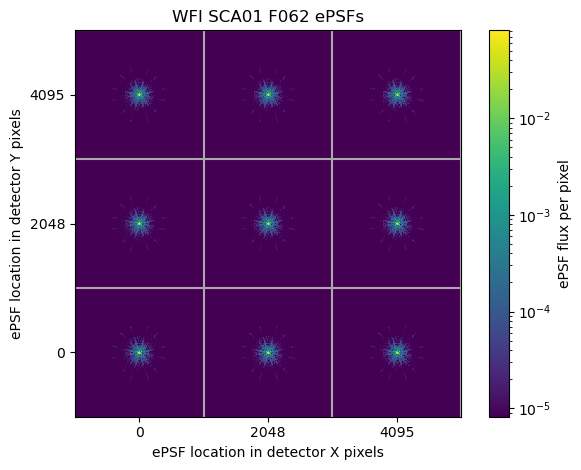

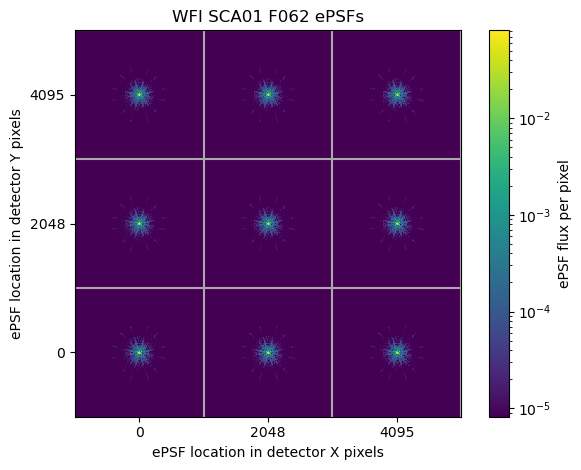

In [10]:
grid = wfi.psf_grid(num_psfs=9, all_detectors=False, verbose=False, fov_pixels=182, oversample=1, monochromatic=10000e-10)

grid.plot_grid()

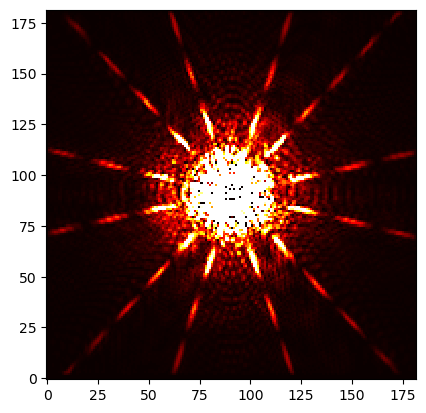

In [11]:

size = 91
x_0 = y_0 = 2044
y, x = np.mgrid[y_0-size:y_0+size, x_0-size:x_0+size]
psf = grid.evaluate(x=x, y=y, flux=1, x_0=x_0, y_0=y_0)

plt.imshow(psf, vmin=0, vmax=0.00001)

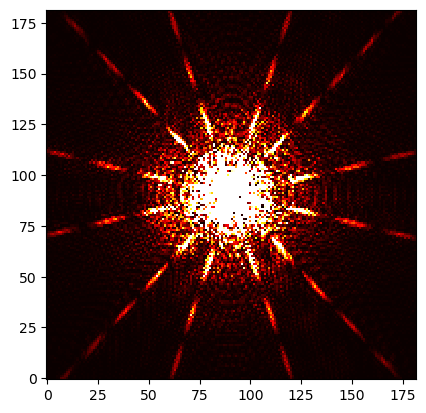

In [12]:

wfi.detector_position = (2044, 2044)
psf_truth = wfi.calc_psf(fov_pixels=182, oversample=1, monochromatic=10000e-10) [0].data
plt.imshow(psf_truth, vmin=0, vmax=0.00001)

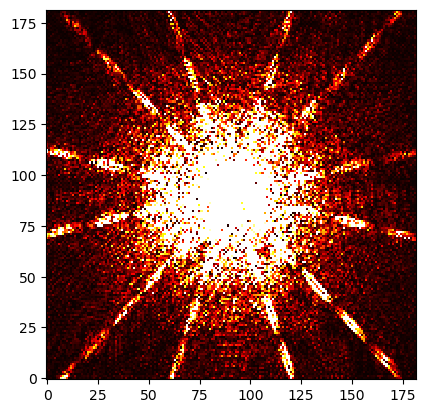

In [13]:
plt.imshow(abs(psf_truth - psf), vmin=-0, vmax=0.000001)